<a href="https://colab.research.google.com/github/Sylvariane/classification_image_deep_learning/blob/main/P06_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# system libraries
import os
import warnings
warnings.filterwarnings("ignore")
import glob
from time import time

# data structure libraries
import numpy as np
import pandas as pd

# data visualisation libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.transform import resize
import seaborn as sns

# deep learning libraries
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
# Google Drive connexion
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Trials with two breeds of dogs

In [3]:
# loading dataset and selecting images parameters

path = '/content/drive/My Drive/Ingénieur ML - OC/P6/datasets/test_samples_reduced/'
img_width, img_height = 256, 256
channels = 3
batch_size = 64
num_images= 150
image_arr_size= img_width * img_height * channels

Images have been transformed into numpy arrays. With this format, modelisation with deep learning methods can be realized. 

## 1) Data preparation

In [4]:
train_set = image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 516 files belonging to 3 classes.
Using 413 files for training.


In [5]:
val_set = image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 516 files belonging to 3 classes.
Using 103 files for validation.


In [6]:
class_names = train_set.class_names
print(class_names)

['n02088364-beagle', 'n02099712-Labrador_retriever', 'n02106166-Border_collie']


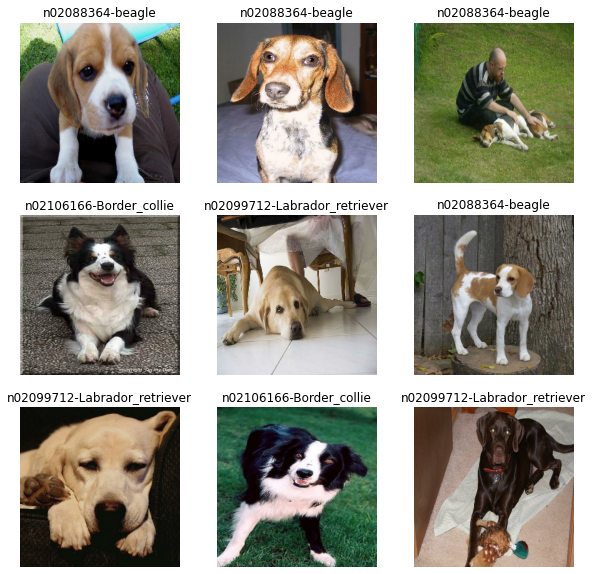

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in train_set.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
for image_batch, labels_batch in train_set:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 256, 256, 3)
(64,)


## 2) Convnet modelisation

In [9]:
num_classes = 3

model = keras.Sequential()
model.add(keras.Input(shape=(img_height, img_width, channels)))
model.add(layers.Rescaling(1./255))
model.add(layers.Conv2D(128, 3, activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation="softmax"))

model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 254, 254, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0

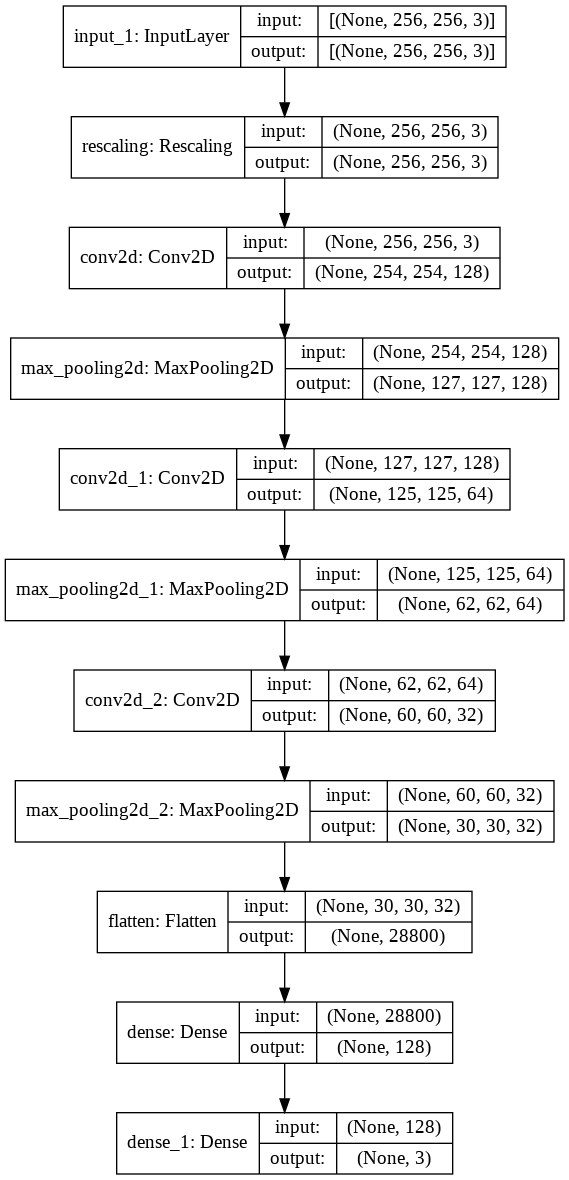

In [11]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cnn_1.png', show_shapes=True, show_layer_names=True)

In [12]:
epochs = 60

history = model.fit(
  train_set,
  validation_data=val_set,
  epochs=epochs)

Epoch 1/60
7/7 [==============================] - 6s 428ms/step - loss: 1.1680 - accuracy: 0.3099 - val_loss: 1.0977 - val_accuracy: 0.3398
Epoch 2/60
7/7 [==============================] - 2s 182ms/step - loss: 1.0961 - accuracy: 0.3850 - val_loss: 1.0940 - val_accuracy: 0.3592
Epoch 3/60
7/7 [==============================] - 2s 180ms/step - loss: 1.0730 - accuracy: 0.4358 - val_loss: 1.0859 - val_accuracy: 0.3495
Epoch 4/60
7/7 [==============================] - 2s 182ms/step - loss: 1.0364 - accuracy: 0.4358 - val_loss: 1.0883 - val_accuracy: 0.3689
Epoch 5/60
7/7 [==============================] - 2s 184ms/step - loss: 0.9685 - accuracy: 0.5472 - val_loss: 1.1596 - val_accuracy: 0.3981
Epoch 6/60
7/7 [==============================] - 2s 183ms/step - loss: 0.9030 - accuracy: 0.5811 - val_loss: 1.0650 - val_accuracy: 0.4466
Epoch 7/60
7/7 [==============================] - 2s 185ms/step - loss: 0.8137 - accuracy: 0.6368 - val_loss: 1.0672 - val_accuracy: 0.4951
Epoch 8/60
7/7 [====

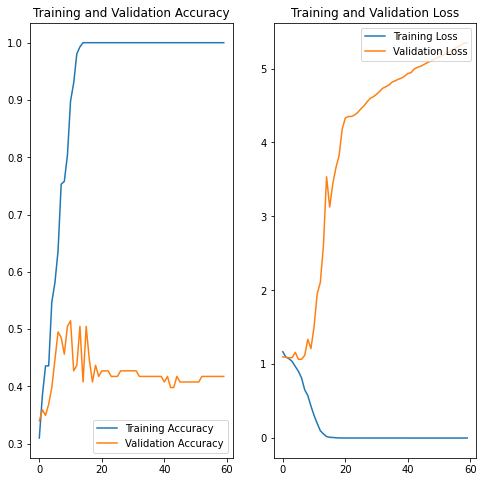

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Ressources:**
- https://hadrienj.github.io/posts/Preprocessing-for-deep-learning/
- https://medium.com/@shehan.a.perera/a-comparison-of-sift-surf-and-orb-333d64bcaaea
- https://www.tensorflow.org/tutorials/load_data/images
- https://www.tensorflow.org/tutorials/images/classification
- *Deep Learning with TensorFlow*, 2nd Edition, François Chollet